# Final exam

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

AdvWorksCusts.csv
AW_AveMonthSpend.csv
AW_BikeBuyer.csv
AW_test.csv
FinalExam-Test.zip
FinalExam.zip
FinalExamNotebook.ipynb


## load datasets

In [3]:
AdvWorksCusts = pd.read_csv('AdvWorksCusts.csv')

In [4]:
def count_unique(data, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(data[col].value_counts())
        
def exploreData(data):
    print(data.columns)
    print(data.head())
    print(data.dtypes)
    print(data.describe())
    
def plot_bars(data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of bikesales by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of bikesales')# Set text for y axis
        plt.show()
        
def plot_histogram(data, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        data[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
def plot_density_hist(data, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()

In [5]:
exploreData(AdvWorksCusts)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Lind

In [6]:
count_unique(AdvWorksCusts,['Title', 'Suffix', 'CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus'])


For column Title
Mr.     43
Ms.     38
Sr.      4
Mrs.     2
Ms       1
Name: Title, dtype: int64

For column Suffix
Jr.    2
Name: Suffix, dtype: int64

For column CountryRegionName
United States     6986
Australia         3217
United Kingdom    1715
France            1602
Germany           1588
Canada            1411
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4792
Partial College        4484
High School            2968
Graduate Degree        2863
Partial High School    1412
Name: Education, dtype: int64

For column Occupation
Professional      4963
Skilled Manual    4065
Management        2734
Clerical          2619
Manual            2138
Name: Occupation, dtype: int64

For column Gender
M    8351
F    8168
Name: Gender, dtype: int64

For column MaritalStatus
M    8917
S    7602
Name: MaritalStatus, dtype: int64


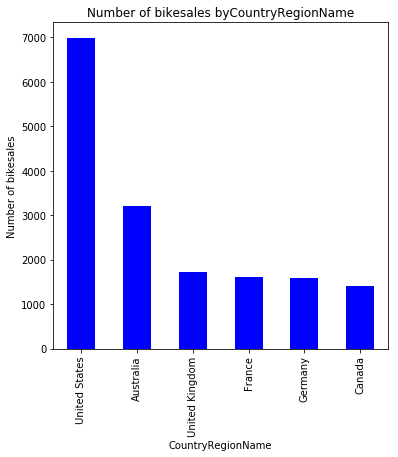

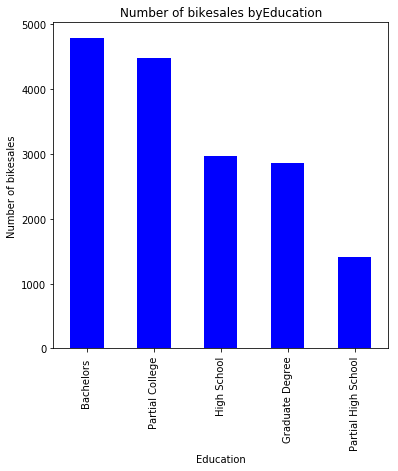

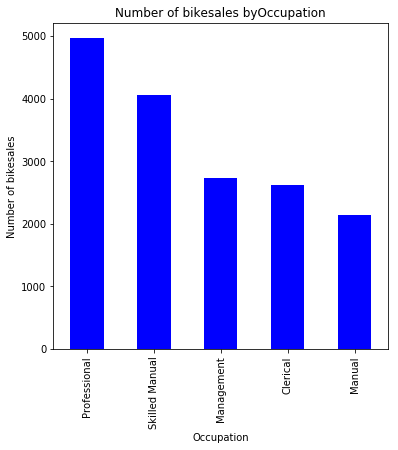

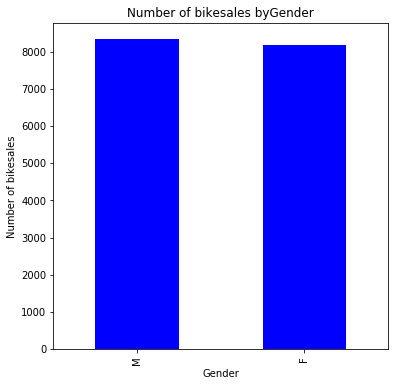

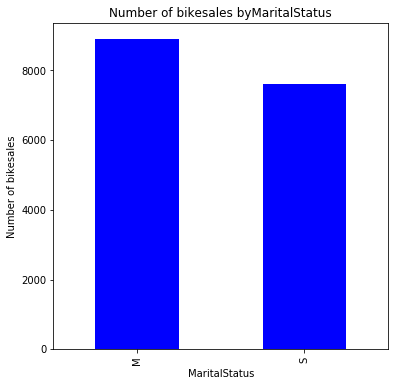

In [7]:
plot_bars(AdvWorksCusts,['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus'])

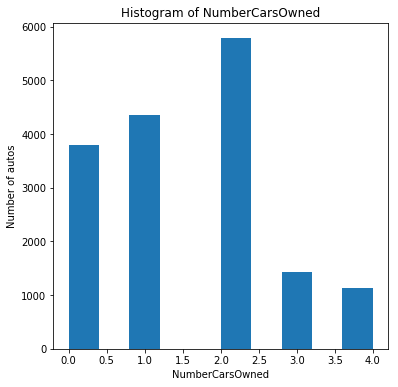

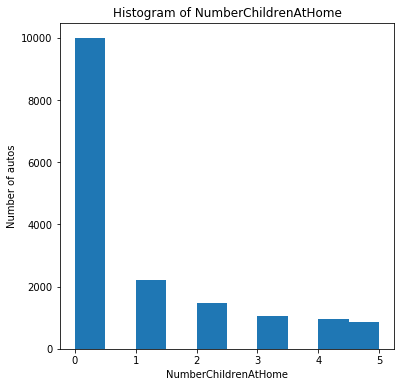

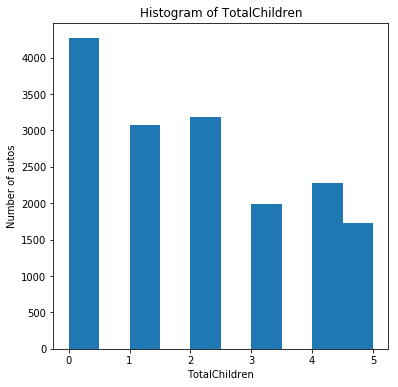

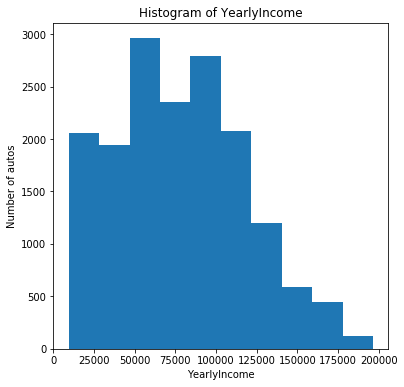

In [8]:
plot_histogram(AdvWorksCusts,['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'])

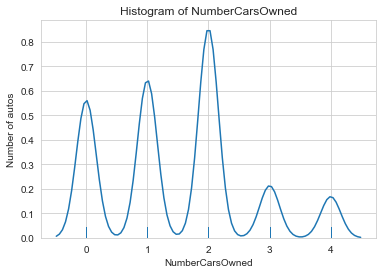

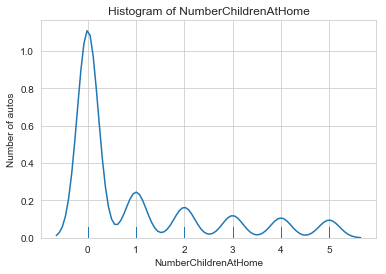

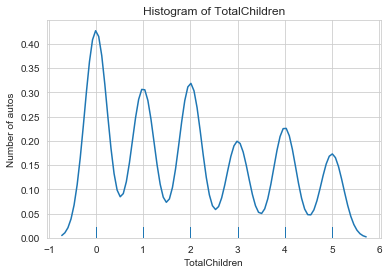

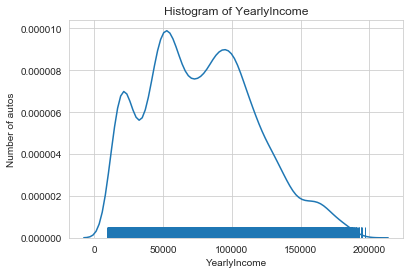

In [9]:
plot_density_hist(AdvWorksCusts,['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome'])

In [10]:
AW_AveMontSpend = pd.read_csv('AW_AveMonthSpend.csv')

In [11]:
exploreData(AW_AveMontSpend)

Index(['CustomerID', 'AveMonthSpend'], dtype='object')
   CustomerID  AveMonthSpend
0       11000             89
1       11001            117
2       11002            123
3       11003             50
4       11004             95
CustomerID       int64
AveMonthSpend    int64
dtype: object
         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000


In [12]:
AW_AveMontSpend['AveMonthSpend'].median()

68.0

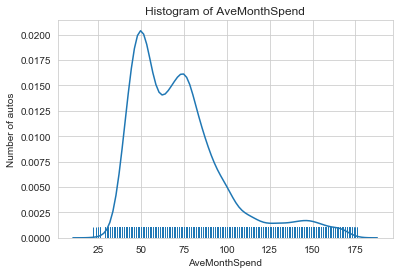

In [13]:
plot_density_hist(AW_AveMontSpend,['AveMonthSpend'])

In [14]:
AW_BikeBuyer = pd.read_csv('AW_BikeBuyer.csv')

In [15]:
exploreData(AW_BikeBuyer)

Index(['CustomerID', 'BikeBuyer'], dtype='object')
   CustomerID  BikeBuyer
0       11000          0
1       11001          1
2       11002          0
3       11003          0
4       11004          1
CustomerID    int64
BikeBuyer     int64
dtype: object
         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000


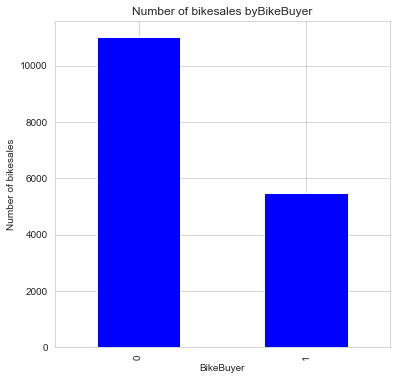

In [16]:
plot_bars(AW_BikeBuyer,['BikeBuyer'])

In [17]:
AdvWorksCustsMerged = AdvWorksCusts

In [18]:
AdvWorksCustsMerged = pd.merge(AdvWorksCusts, AW_AveMontSpend, on='CustomerID', how='inner')

In [19]:
exploreData(AdvWorksCustsMerged)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria  

In [20]:
AdvWorksCustsMergedFull = pd.merge(AdvWorksCustsMerged, AW_BikeBuyer, on='CustomerID', how='inner')

In [21]:
exploreData(AdvWorksCustsMergedFull)

Index(['CustomerID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend', 'BikeBuyer'],
      dtype='object')
   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName    ...      \
0      3761 N. 14th St          NaN  Rockhampton        Queensland    ...       
1           2243 W St.          N